In [1]:
from matplotlib import cm
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
def find_lines(im):
    img = Image.open(im,'r').convert('L')
    image = np.asarray(img)

    # Line finding using the Probabilistic Hough Transform.
    edges = canny(image, 2, 50, 100)
    lines = probabilistic_hough_line(edges, threshold=10, line_length=20,
                                     line_gap=3)
    f = np.extract(edges == 0, edges)
    t = np.extract(edges == 1,edges)
    # Generating figure 2.
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6), sharex=True,
                                        sharey=True)
    plt.tight_layout()

    ax0.imshow(image, cmap=cm.gray)
    ax0.set_title('Input image')
    ax0.set_axis_off()
    ax0.set_adjustable('box-forced')

    ax1.imshow(edges, cmap=cm.gray)
    ax1.set_title('Canny edges')
    ax1.set_axis_off()
    ax1.set_adjustable('box-forced')

    ax2.imshow(edges * 0)
    for line in lines:
        p0, p1 = line
        ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

    row2, col2 = image.shape
    ax2.axis((0, col2, row2, 0))

    ax2.set_title('Probabilistic Hough')
    ax2.set_axis_off()
    ax2.set_adjustable('box-forced')

    plt.show()
    print 'n_lines = ',len(lines), 'n_edges = ',len(t)
    return len(lines)

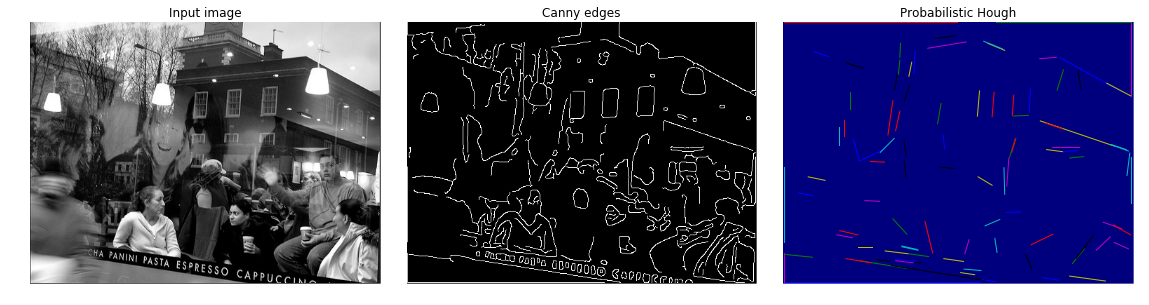

n_lines =  95 n_edges =  11315


In [3]:
a=find_lines('233972220_76f7552d35.jpg')

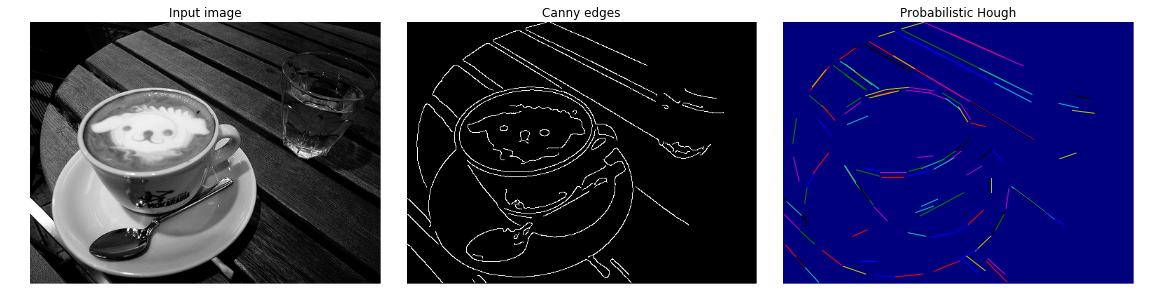

n_lines =  111 n_edges =  6843


In [39]:
b = find_lines('373833933_4ecb66b914.jpg')

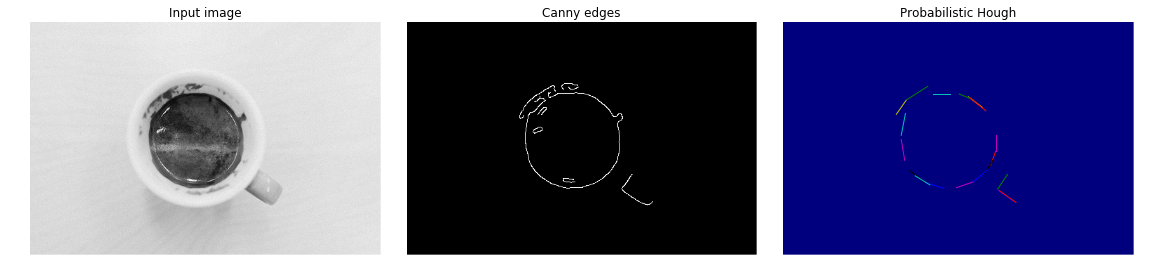

n_lines =  19 n_edges =  916


In [40]:
c = find_lines('18288798320_51510354d4.jpg')

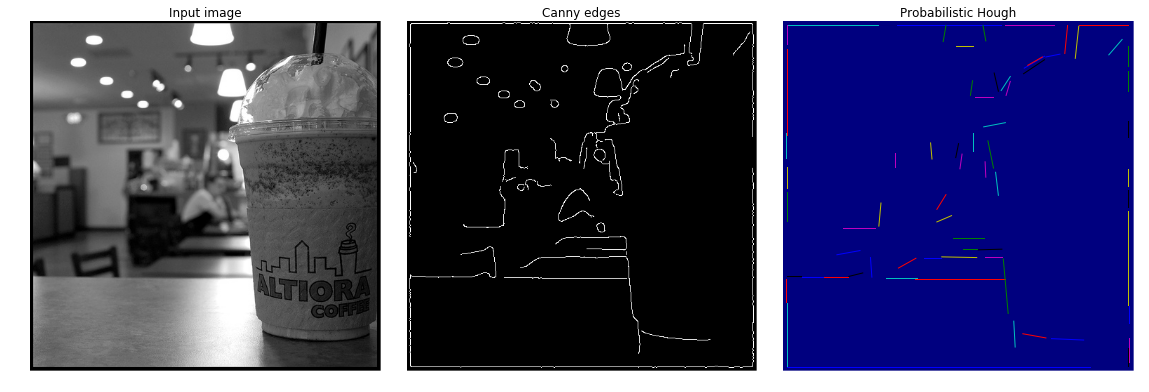

n_lines =  68 n_edges =  5335


In [42]:
d = find_lines('291057746_3f67d3bf3c.jpg')

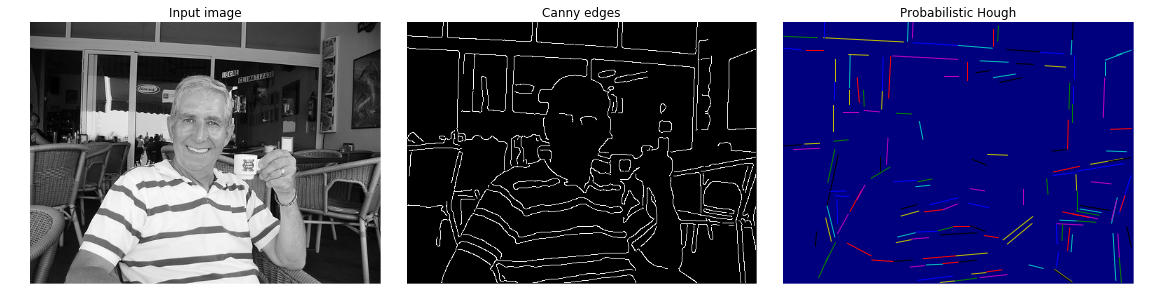

n_lines =  145 n_edges =  9871


In [43]:
e = find_lines('338299651_5c4a9f7931.jpg')

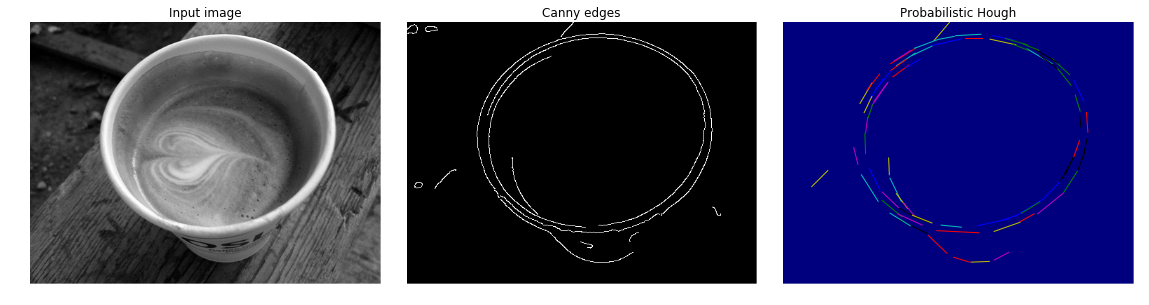

n_lines =  73 n_edges =  2977


In [44]:
f=find_lines('1176352575_27adfc717c.jpg')